<a href="https://colab.research.google.com/github/dadhichvivek/ML-Project/blob/main/pubg_positioning_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Data Reading and Description

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import plotly.express as px
import numpy as np


In [10]:
# Train/test data Reading 

train_df = pd.read_csv('train.csv')

test_df = pd.read_csv('test.csv')

print(train_df.shape,test_df.shape)

(99999, 29) (99999, 28)


In [11]:
# look at some of data points
train_df.sample(50000)

Id         groupId  ... winPoints  winPlacePerc
39389  df88e06f0dcf1f  385a93f80a9293  ...         0        0.0714
174    1615abd7062d41  9e888fbff2a36d  ...         0        0.8667
34057  d038240906710e  56a9b5dbc23ac6  ...         0        0.7586
90328  40cb441b7a7553  42e057391adce5  ...      1512        0.9615
59460  d6cf7574c2b4ed  0e7e05fa5db4ca  ...      1488        0.7872
...               ...             ...  ...       ...           ...
13557  d94a87aa034cf1  2a478487ce965c  ...         0        0.5000
97471  8e42152925143b  3555b070e38903  ...      1540        0.5000
7840   65fe097901c034  2727c784443da4  ...      1550        0.3462
5548   6b20317d218734  f97c5ab8a76784  ...         0        0.8750
956    535e284e442faf  c9089fc4253108  ...         0        0.7500

[50000 rows x 29 columns]

In [12]:
test_df.head(50000)

Id         groupId  ... weaponsAcquired  winPoints
0      9329eb41e215eb  676b23c24e70d6  ...               1          0
1      639bd0dcd7bda8  430933124148dd  ...               6          0
2      63d5c8ef8dfe91  0b45f5db20ba99  ...               4          0
3      cf5b81422591d1  b7497dbdc77f4a  ...               3          0
4      ee6a295187ba21  6604ce20a1d230  ...               4          0
...               ...             ...  ...             ...        ...
49995  1910bafd437368  35bf2d6c847808  ...               6          0
49996  30118f1ce8cdce  985d2bdb4d6107  ...               2          0
49997  8c0681297ba36b  d8a39faaa4c470  ...               6          0
49998  c2917ecb1f04b9  3fccc7a4dc7311  ...               5       1500
49999  17e2077d641b46  ae1a37b8e0b362  ...               4       1494

[50000 rows x 28 columns]

In [13]:
# data description
train_df.describe()

assists        boosts  ...     winPoints  winPlacePerc
count  99999.000000  99999.000000  ...  99999.000000  99999.000000
mean       0.233242      1.119341  ...    606.346213      0.473665
std        0.588477      1.724824  ...    739.522099      0.307768
min        0.000000      0.000000  ...      0.000000      0.000000
25%        0.000000      0.000000  ...      0.000000      0.200000
50%        0.000000      0.000000  ...      0.000000      0.461500
75%        0.000000      2.000000  ...   1495.000000      0.741900
max       13.000000     21.000000  ...   1972.000000      1.000000

[8 rows x 25 columns]

In [14]:
# data information
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               99999 non-null  object 
 1   groupId          99999 non-null  object 
 2   matchId          99999 non-null  object 
 3   assists          99999 non-null  int64  
 4   boosts           99999 non-null  int64  
 5   damageDealt      99999 non-null  float64
 6   DBNOs            99999 non-null  int64  
 7   headshotKills    99999 non-null  int64  
 8   heals            99999 non-null  int64  
 9   killPlace        99999 non-null  int64  
 10  killPoints       99999 non-null  int64  
 11  kills            99999 non-null  int64  
 12  killStreaks      99999 non-null  int64  
 13  longestKill      99999 non-null  float64
 14  matchDuration    99999 non-null  int64  
 15  matchType        99999 non-null  object 
 16  maxPlace         99999 non-null  int64  
 17  numGroups   

# EDA

correlation within the data

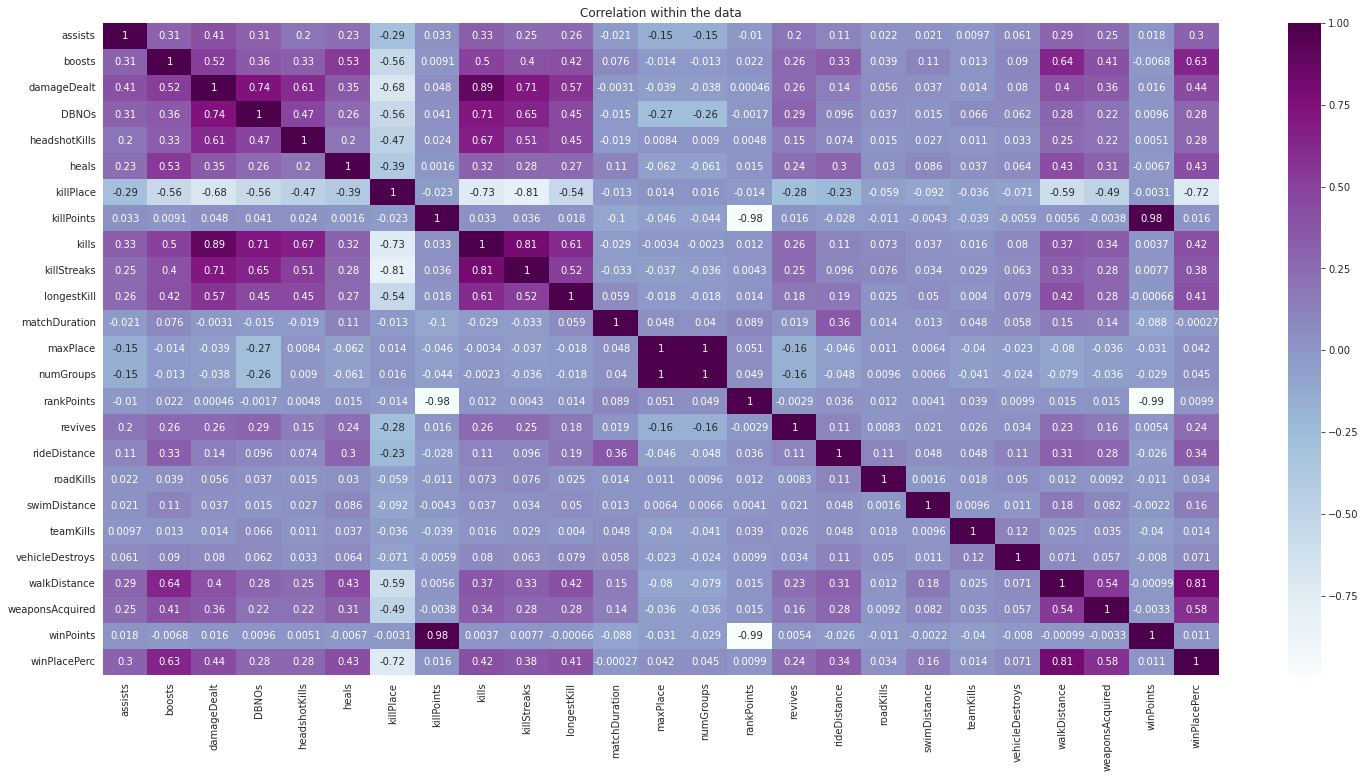

In [15]:
plt.figure(figsize=[25,12])
plt.title("Correlation within the data")
sns.heatmap(train_df.corr(),annot = True,cmap = "BuPu");

number of unique values for ID's

In [16]:
id_cols = train_df.columns[:3]

for i in id_cols:
  print(f" {i} : {train_df[i].nunique()}")

 Id : 99999
 groupId : 97542
 matchId : 41821


Assists v/s killpoints v/s kills v/s winpercentage

In [17]:
# taking a subset of data for plotting
exp_df = train_df.sample(30_000)

In [18]:
fig = px.scatter(exp_df, x = "assists", y = "kills",color="winPlacePerc", size="assists",hover_name="Id")
fig.show()

DamageDealt v/s heals v/s kills v/s winplacepercentage

In [19]:
fig = px.scatter(exp_df, y = "damageDealt", x = "heals", log_y= False, color = "kills", hover_name = "winPlacePerc", size = "damageDealt")
fig.show()

match duration v/s walk distance v/s swim distance

In [20]:
fig = px.scatter(exp_df, x = "matchDuration", y = "walkDistance",size = "swimDistance",
                 color = "revives",width=1200, hover_name = "winPoints")
fig.show()

Win percentage distribution

In [21]:
fig = px.histogram(exp_df,x = "winPlacePerc",color = "winPlacePerc")
fig.show()

# 2.Data Pre-Processing

In [22]:
# Dropping id columns for bot train/test

data_train = train_df.drop(columns = id_cols)
data_test = test_df.drop(columns = id_cols)

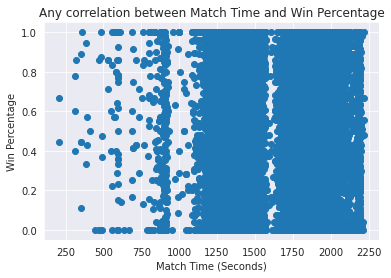

In [23]:
# does game length have any correlation with win percentage
import matplotlib.pyplot as plt

plt.scatter(x=train_df.iloc[:,14], y=train_df.iloc[:, 28])
plt.xlabel("Match Time (Seconds)")
plt.ylabel("Win Percentage")
plt.title("Any correlation between Match Time and Win Percentage")
plt.show()

In [24]:
data_train.columns

Index(['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'killPlace', 'killPoints', 'kills', 'killStreaks', 'longestKill',
       'matchDuration', 'matchType', 'maxPlace', 'numGroups', 'rankPoints',
       'revives', 'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'winPlacePerc'],
      dtype='object')

Checking for null-values

In [25]:
data_train.isna().sum()

assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64

In [26]:
data_test.isna().sum().any()

False

In [27]:
# filling one missing with mean
data_train["winPlacePerc"] = data_train["winPlacePerc"].fillna(np.mean(data_train.winPlacePerc))

Encoding categorical data

In [28]:
data_train.matchType.value_counts()

squad-fpp           39668
duo-fpp             22368
squad               14101
solo-fpp            12130
duo                  6876
solo                 4088
normal-squad-fpp      364
crashfpp              151
normal-duo-fpp        125
normal-solo-fpp        40
flaretpp               40
normal-squad           19
flarefpp               17
crashtpp                6
normal-duo              4
normal-solo             2
Name: matchType, dtype: int64

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [30]:
data_train["matchType"] = le.fit_transform(data_train["matchType"])
data_test["matchType"] = le.transform(data_test["matchType"])

Splitting target and datapoints

In [31]:
data = data_train.drop("winPlacePerc",axis = 1)
target = data_train["winPlacePerc"]

scaling numerical features

In [32]:
from sklearn.preprocessing import StandardScaler
sc  = StandardScaler()

In [33]:
data = sc.fit_transform(data)
data_test = sc.transform(data_test)

Spliting into train/test data

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_train,x_test, y_train,y_test = train_test_split(data,target, random_state = 1234, test_size = 0.2)

print(x_train.shape, x_test.shape)

(79999, 25) (20000, 25)


# 3.Model


In [36]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import time
import pickle

In [37]:
# define a pipeline to train a few models 
pipeline = {
      "LinearRegression" : make_pipeline(LinearRegression()),
      "RandomForestRegressor" : make_pipeline(RandomForestRegressor()),
}

In [38]:
# train the models on the trian data

fitted_models = {}

for algo,pipeline in pipeline.items():
  model = pipeline.fit(x_train[:50_000],y_train[:50_000])
  fitted_models[algo] = model


print("Finished training..")

Finished training..


In [39]:
fitted_models

{'LinearRegression': Pipeline(steps=[('linearregression', LinearRegression())]),
 'RandomForestRegressor': Pipeline(steps=[('randomforestregressor', RandomForestRegressor())])}

In [40]:
# train score
for model in fitted_models:
  print(f" Score for {model} is {fitted_models[model].score(x_train[:10_000],y_train[:10_000])}")

 Score for LinearRegression is 0.8364269294030946
 Score for RandomForestRegressor is 0.9874342749404433


In [41]:
# test score
for model in fitted_models:
  print(f" Score for {model} is {fitted_models[model].score(x_test[:10_000],y_test[:10_000])}")

 Score for LinearRegression is 0.8302047947152367
 Score for RandomForestRegressor is 0.9127594241159671


Mean Absolute Error

In [42]:
from sklearn.metrics import mean_absolute_error

In [43]:
pred_test = fitted_models["RandomForestRegressor"].predict(x_test[:10_000])
                                                       

In [44]:
print(f"{mean_absolute_error(pred_test,y_test[:10_000]):.4f}")

0.0639


In [45]:
# subset of the large data for hyperparameter tuning
x_train_small,x_test_small,y_train_small,y_test_small = x_train[:50_000],x_test[:30_000],y_train[:50_000],y_test[:30_000]

In [46]:
# function to tune an test the model
def train_and_eval(x_train,y_train,x_test,y_test, **params):
    model = RandomForestRegressor(random_state=42, n_jobs = -1, **params)
    model.fit(x_train,y_train)
    train_mae = mean_absolute_error(model.predict(x_train),y_train)
    test_mae = mean_absolute_error(model.predict(x_test),y_test)
    return model,train_mae,test_mae

In [47]:
# test 1
model,train_mae,test_mae = train_and_eval(x_train_small,y_train_small,x_test_small,y_test_small)
print(f"Model : {model},\n\n train_mae : {train_mae:.4f}, test_mae : {test_mae:.4f}\n")

Model : RandomForestRegressor(n_jobs=-1, random_state=42),

 train_mae : 0.0238, test_mae : 0.0638



In [48]:
# test 2 
model,train_mae,test_mae = train_and_eval(x_train_small,y_train_small,x_test_small,y_test_small, n_estimators = 30, max_depth = 10, min_samples_leaf = 3)
print(f"Model : {model},\n\n train_mae : {train_mae:.4f}, test_mae : {test_mae:.4f}\n")

Model : RandomForestRegressor(max_depth=10, min_samples_leaf=3, n_estimators=30,
                      n_jobs=-1, random_state=42),

 train_mae : 0.0618, test_mae : 0.0672



In [49]:
# test 3

model,train_mae,test_mae = train_and_eval(x_train_small,y_train_small,x_test_small,y_test_small, n_estimators = 50, max_depth = 5, min_samples_leaf = 3)
print(f"Model : {model},\n\n train_mae : {train_mae:.4f}, test_mae : {test_mae:.4f}\n")

Model : RandomForestRegressor(max_depth=5, min_samples_leaf=3, n_estimators=50,
                      n_jobs=-1, random_state=42),

 train_mae : 0.0844, test_mae : 0.0847



In [50]:
# test 4

model,train_mae,test_mae = train_and_eval(x_train_small,y_train_small,x_test_small,y_test_small, n_estimators = 150, max_depth = 15, min_samples_leaf = 3)
print(f"Model : {model},\n\n train_mae : {train_mae:.4f}, test_mae : {test_mae:.4f}\n")

Model : RandomForestRegressor(max_depth=15, min_samples_leaf=3, n_estimators=150,
                      n_jobs=-1, random_state=42),

 train_mae : 0.0417, test_mae : 0.0636



Making Predictions

In [51]:
model = RandomForestRegressor(n_estimators = 110, max_depth = 13, min_samples_leaf = 3)

Train

In [52]:
start = time.time()
model.fit(x_train,y_train)
end = time.time()

In [53]:
print(f"Finished training in {(end-start):.2f} seconds.")

Finished training in 56.29 seconds.


In [54]:
# saving this model

with open("Model_RF.pkl","wb") as f:
    pickle.dump(model,f)

train score

In [55]:
pred_train = model.predict(x_train)
print(mean_absolute_error(pred_train,y_train))

0.051428202441331665


Test Score

In [56]:
pred_test = model.predict(x_test)
print(mean_absolute_error(pred_test,y_test))

0.06344137112395576


Visualizations and weights

In [57]:
from sklearn.tree import plot_tree, export_text

In [58]:
model.estimators_[0]

DecisionTreeRegressor(max_depth=13, max_features='auto', min_samples_leaf=3,
                      random_state=1281781391)

In [59]:
model.estimators_[109]

DecisionTreeRegressor(max_depth=13, max_features='auto', min_samples_leaf=3,
                      random_state=1725244270)

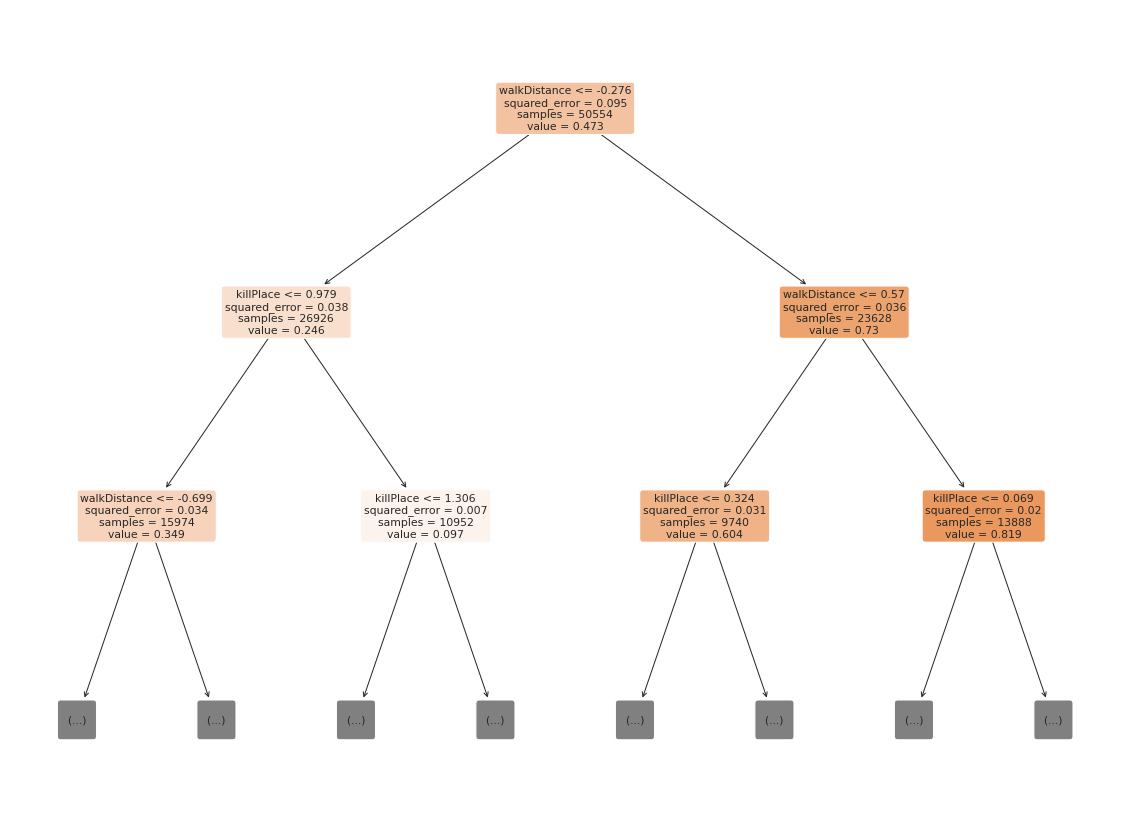

In [60]:
plt.figure(figsize = [20,15])
plot_tree(model.estimators_[0],max_depth = 2, feature_names=data_train.columns[:-1],filled = True,rounded = True);

Saving Importances

In [61]:
importance_df = pd.DataFrame({
    'feature': data_train.columns[:-1],
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [62]:
importance_df[:10]

feature  importance
22   walkDistance    0.740071
6       killPlace    0.181771
14      numGroups    0.017005
11  matchDuration    0.013458
13       maxPlace    0.007714
8           kills    0.005949
17   rideDistance    0.005844
1          boosts    0.004701
10    longestKill    0.003613
9     killStreaks    0.003469

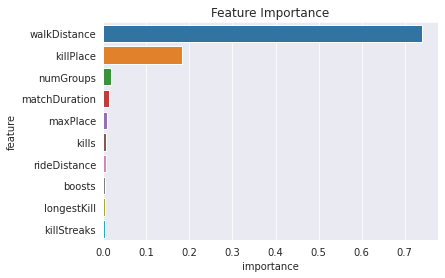

In [63]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

Make predictions on test data and Submission

In [64]:
sample = pd.read_csv("sample_submission.csv")

In [65]:
sample.shape

(99999, 2)

In [66]:
pd.DataFrame(data_test)

0         1         2   ...        22        23        24
0     -0.396351 -0.648963 -0.465434  ... -0.481535 -1.086468 -0.819920
1     -0.396351  1.670126  0.284657  ...  0.723854  0.944695 -0.819920
2      1.302959 -0.648963 -0.630332  ... -0.313000  0.132230 -0.819920
3     -0.396351 -0.648963 -0.382809  ...  0.550932 -0.274003 -0.819920
4     -0.396351  1.670126  1.172614  ...  1.521823  0.132230 -0.819920
...         ...       ...       ...  ...       ...       ...       ...
99994 -0.396351 -0.648963 -0.767845  ... -0.948777 -1.492701 -0.819920
99995 -0.396351 -0.648963 -0.180183  ... -0.890979  0.538463  1.277391
99996  1.302959 -0.648963 -0.020339  ... -0.741170 -0.274003  1.201666
99997 -0.396351 -0.648963  0.110122  ... -0.746568 -0.274003 -0.819920
99998 -0.396351 -0.648963 -0.767845  ...  0.239674  0.132230 -0.819920

[99999 rows x 25 columns]

In [67]:
predictions = model.predict(data_test)

In [68]:
predictions[:10]

array([0.26264235, 0.87750861, 0.70183441, 0.55746141, 0.92927758,
       0.00922864, 0.70511026, 0.27355391, 0.57041214, 0.6279779 ])

In [69]:
sample["winPlacePerc"]=predictions

In [70]:
sample

Id  winPlacePerc
0      9329eb41e215eb      0.262642
1      639bd0dcd7bda8      0.877509
2      63d5c8ef8dfe91      0.701834
3      cf5b81422591d1      0.557461
4      ee6a295187ba21      0.929278
...               ...           ...
99994  a339094d1ee286      0.077968
99995  b7461717920c77      0.078205
99996  266823d35adde0      0.319449
99997  bfdef8ade16b74      0.664798
99998  ded7bdd22152a1      0.453159

[99999 rows x 2 columns]